<a href="https://colab.research.google.com/github/nirmal20092003/data-science/blob/main/IRIS_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load dataset

In [2]:
df = pd.read_csv('/content/sample_data/IRIS.csv')
print(" Dataset Loaded Successfully\n")
print(df.head())

 Dataset Loaded Successfully

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


 Visualize class distribution

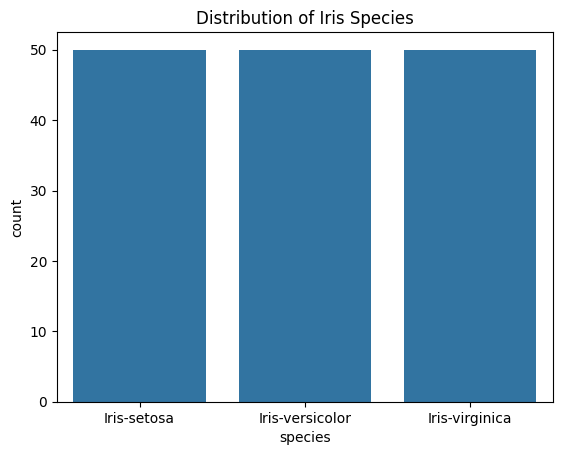

In [3]:
sns.countplot(data=df, x='species')
plt.title("Distribution of Iris Species")
plt.show()

Feature and label separation

In [4]:
X = df.drop('species', axis=1)
y = df['species']

 Encode species labels

In [5]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

Train model

In [7]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Predict and evaluate

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print("\n Model Evaluation")
print(f"Accuracy: {accuracy:.2f}%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


 Model Evaluation
Accuracy: 100.00%

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



User input for prediction

In [9]:
print("\n Enter flower measurements to predict its species:")
sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Sepal Width (cm): "))
petal_length = float(input("Petal Length (cm): "))
petal_width = float(input("Petal Width (cm): "))

input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
prediction = model.predict(input_data)
predicted_species = le.inverse_transform(prediction)

print(f"\n Predicted Iris Species: **{predicted_species[0]}**")


 Enter flower measurements to predict its species:
Sepal Length (cm): 5.1
Sepal Width (cm): 3.5
Petal Length (cm): 1.4
Petal Width (cm): 0.2

 Predicted Iris Species: **Iris-setosa**


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
